 ## 0. Подгрузка модулей

In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Bank Loan Status Dataset

[Ссылка на скачивание](https://www.kaggle.com/zaurbegiev/my-dataset)

У факторов отсутствует описание, однако из названия все становится ясно.

## 1.1. Подгрузка данных

__Антон:__ В тестовой выборке нет таргета! Не получится её использовать для наших целей, сразу лучше дропнуть

In [2]:
df_1 = pd.read_csv("credit_test.csv", sep = ',')
df_2 = pd.read_csv("credit_train.csv", sep = ',')

df = df_2.copy()
# df = pd.concat([df_1, df_2], ignore_index=True, sort =False).reset_index()

# df.head()

In [3]:
df_1.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [4]:
df_2.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [5]:
df_2.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
# проверяю, насколько коррелируют Bankruptcies и таргет
df_2.groupby(['Loan Status', 'Bankruptcies']).Bankruptcies.count()
# вроде ок

Loan Status  Bankruptcies
Charged Off  0.0             20183
             1.0              2287
             2.0                92
             3.0                18
             4.0                 7
             5.0                 2
Fully Paid   0.0             68591
             1.0              8188
             2.0               325
             3.0                75
             4.0                20
             5.0                 5
             6.0                 2
             7.0                 1
Name: Bankruptcies, dtype: int64

In [7]:
# проверяю, насколько коррелируют Tax Liens и таргет
df_2.groupby(['Loan Status', 'Tax Liens']).Bankruptcies.count()
# вроде ок

Loan Status  Tax Liens
Charged Off  0.0          22100
             1.0            330
             2.0             90
             3.0             36
             4.0             21
             5.0              6
             6.0              2
             7.0              3
             9.0              1
Fully Paid   0.0          75768
             1.0           1013
             2.0            284
             3.0             75
             4.0             37
             5.0             10
             6.0             10
             7.0              4
             9.0              2
             10.0             1
             11.0             2
             15.0             1
Name: Bankruptcies, dtype: int64

### Промежуточный вывод

Кажется, что ликов нет. Даже странно, что клиенты с банкротствами и задолженностью по уплате налогов неплохо платят свои кредиты.

## 1.2 .Предобработка данных

### Удаляем идентицифирующие факторы

А зачем? -- Антон

In [8]:
# таргет -- статус займа
df = df.rename(columns={'Loan Status': 'target'}) 

# df = df.drop(df.columns[[0, 1, 2]], axis=1) 
df['Purpose'] = df['Purpose'].replace('other', 'Other')

df.head()

,Loan ID,Customer ID,target,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### Глазками замечаем, что последние 514 строк - пустые, удаляем их.

In [9]:
df[-514:].isna().sum(axis=0)

Loan ID                         514
Customer ID                     514
target                          514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    514
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

In [10]:
df[-515:].isna().sum(axis=0)

Loan ID                         514
Customer ID                     514
target                          514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            515
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    515
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

In [11]:
df[-514:]

,Loan ID,Customer ID,target,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df[:-514]

## 2.  Анализ факторов

В источнике отсутствует описание факторов, однако из названия все и так ясно.

### Список факторов

| No. | Attribute | Type | Description | Values (if qualitative)
| -:- | --- | --- | --- | ---
| 0 | Current Loan Amount | numeric | - | - |
| 1 | Term | qualitative | - | Short Term |
|  |  |  |  | Long Term |
| 2 | Credit Score | numeric | - | - |
| 3 | Annual Income | numeric | - | - |
| 4 | Years in current job | qualitative | - | 10+ years |
|  |  |  |  | 2 years |
|  |  |  |  | 1 year |
|  |  |  |  | < 1 year |
|  |  |  |  | 5 years |
|  |  |  |  | 7 years |
|  |  |  |  | 3 years |
|  |  |  |  | 6 years |
|  |  |  |  | 8 years |
|  |  |  |  | 4 years |
|  |  |  |  | 9 years |
| 5 | Home Ownership | qualitative | - | Home Mortgage |
|  |  |  |  | Rent |
|  |  |  |  | Own Home |
|  |  |  |  | HaveMortgage |
| 6 | Purpose | qualitative | - | Debt Consolidation |
|  |  |  |  | Other |
|  |  |  |  | Home Improvements |
|  |  |  |  | Business Loan |
|  |  |  |  | Take a Trip |
|  |  |  |  | small_business |
|  |  |  |  | Medical Bills |
|  |  |  |  | Buy House |
|  |  |  |  | Buy a Car |
|  |  |  |  | major_purchase |
|  |  |  |  | Educational Expenses |
|  |  |  |  | moving |
|  |  |  |  | wedding |
|  |  |  |  | vacation |
|  |  |  |  | renewable_energy |
| 7 | Monthly Debt | numeric | - | - |
| 8 | Years of Credit History | numeric | - | - |
| 9 | Months since last delinquent | numeric | - | - |
| 10 | Number of Open Accounts | numeric | - | - |
| 11 | Number of Credit Problems | numeric | - | - |
| 12 | Current Credit Balance | numeric | - | - |
| 13 | Maximum Open Credit | numeric | - | - |
| 14 | target | numeric | - | - |
| 15 | Tax Liens | numeric | - | - |
| 16 | Loan Status | qualitative | - | Charged Off |
|  |  |  |  | Fully Paid |

Присутствует значительное число катеогриальных факторов, придется применять преобразования.

### Разбиваем на train/test, записываем типы переменных и сохраняем

In [13]:
df

,Loan ID,Customer ID,target,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,Other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [15]:
X = df.loc[:, df.columns != 'target']
y = (df.target == 'Fully Paid').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir samples
X_train.to_parquet("samples/X_train.parquet")
X_test.to_parquet("samples/X_test.parquet")
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet("samples/y_train.parquet")
pd.DataFrame(y_test).to_parquet("samples/y_test.parquet")

# сохраняем списки категориальных и колич. переменных
cat_vals = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
num_vals = ['Current Loan Amount','Annual Income','Monthly Debt', 'Years of Credit History',
            'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems',
            'Current Credit Balance', 'Maximum Open Credit', 'Credit Score', 'Tax Liens', 'Bankruptcies']
ids = ['Loan ID','Customer ID']

with open("factors.json", 'w') as f:
    json.dump({'cat_vals': cat_vals, 'num_vals': num_vals, 'ids': ids}, f)


## 3. Статистики и пропуски

### Статистики

In [8]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {np.round(y.sum() / X.shape[0] * 100, 2)}%')

Количество наблюдений: 110353
Количество факторов: 16
Количество целевых событий: 12911.0
Доля целевых событий: 11.7%


### Пропуски


In [9]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {(X[col].isna().sum() / X.shape[0] * 100):.2f}%')

Количество пропусков по фактору Current Loan Amount:
	353 или 0.32%
Количество пропусков по фактору Term:
	353 или 0.32%
Количество пропусков по фактору Credit Score:
	21488 или 19.47%
Количество пропусков по фактору Annual Income:
	21488 или 19.47%
Количество пропусков по фактору Years in current job:
	5002 или 4.53%
Количество пропусков по фактору Home Ownership:
	353 или 0.32%
Количество пропусков по фактору Purpose:
	353 или 0.32%
Количество пропусков по фактору Monthly Debt:
	353 или 0.32%
Количество пропусков по фактору Years of Credit History:
	353 или 0.32%
Количество пропусков по фактору Months since last delinquent:
	58800 или 53.28%
Количество пропусков по фактору Number of Open Accounts:
	353 или 0.32%
Количество пропусков по фактору Number of Credit Problems:
	353 или 0.32%
Количество пропусков по фактору Current Credit Balance:
	353 или 0.32%
Количество пропусков по фактору Maximum Open Credit:
	355 или 0.32%
Количество пропусков по фактору Tax Liens:
	364 или 0.33%
Колич

## 4. Визуальный анализ и выбросы

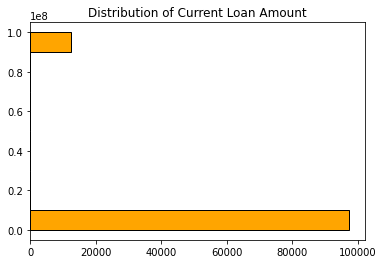

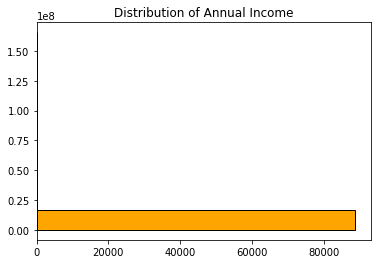

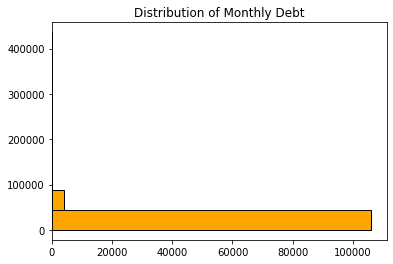

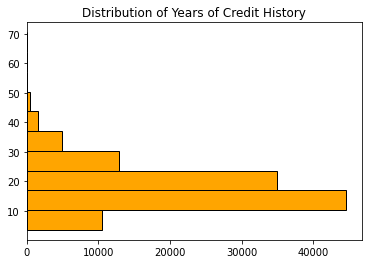

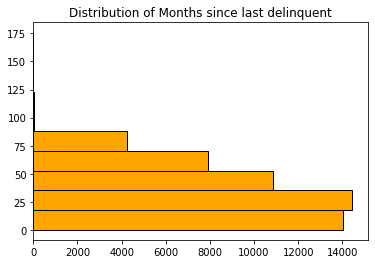

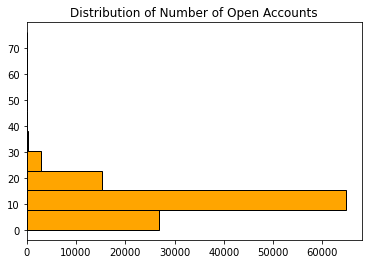

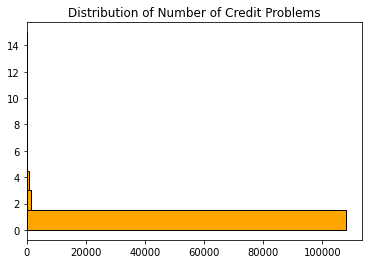

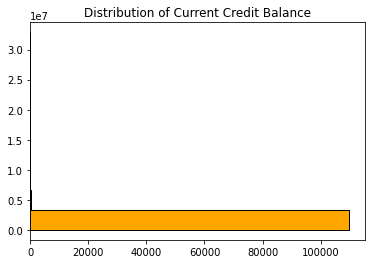

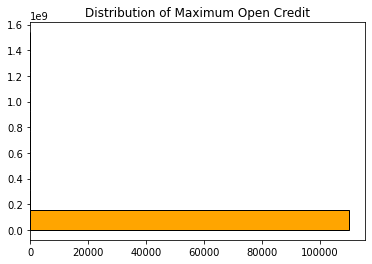

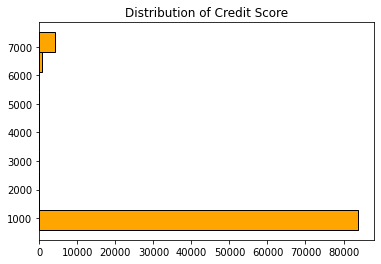

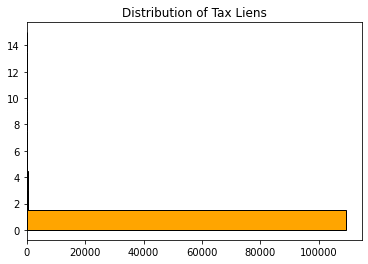

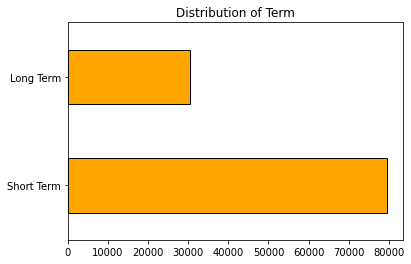

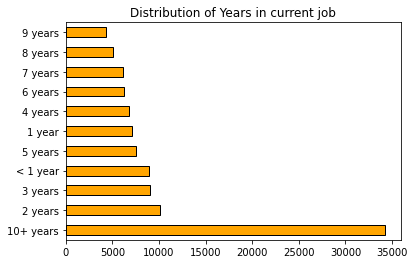

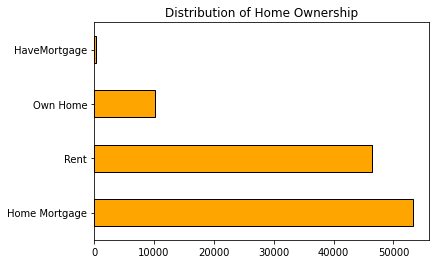

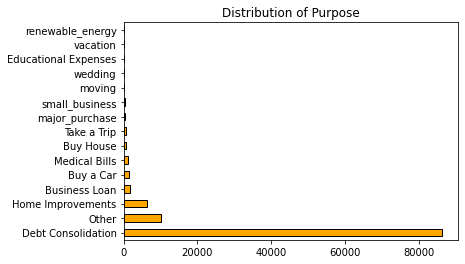

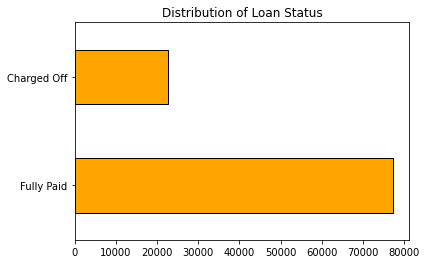

In [10]:
for col in num_vals:
    plt.hist(X[col], color='orange', ec='black', orientation = 'horizontal' )
    plt.title(f'Distribution of {col}')
    plt.show()
for col in cat_vals:
    df[col].value_counts().plot.barh(color='orange', ec='black' , orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

### Выводы

Таблица с большим количеством записей, довольно много пропущенных значений по параметру *Credit Score* и более половины по фактору *Months since last delinquent*. Удовлетворительное количество целевых значений. 